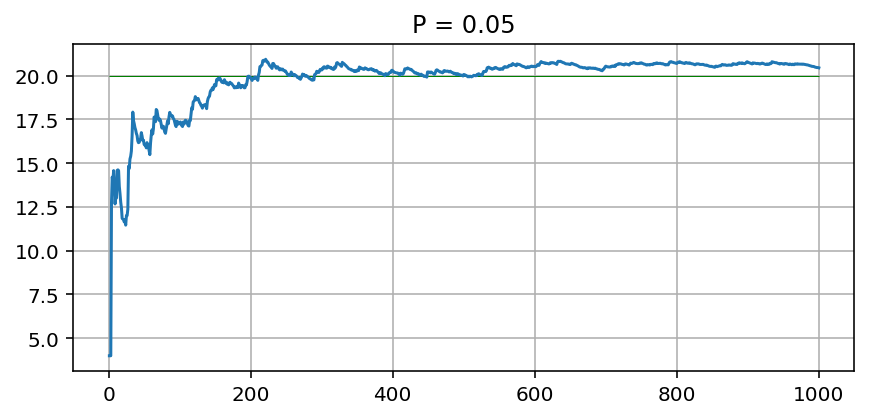

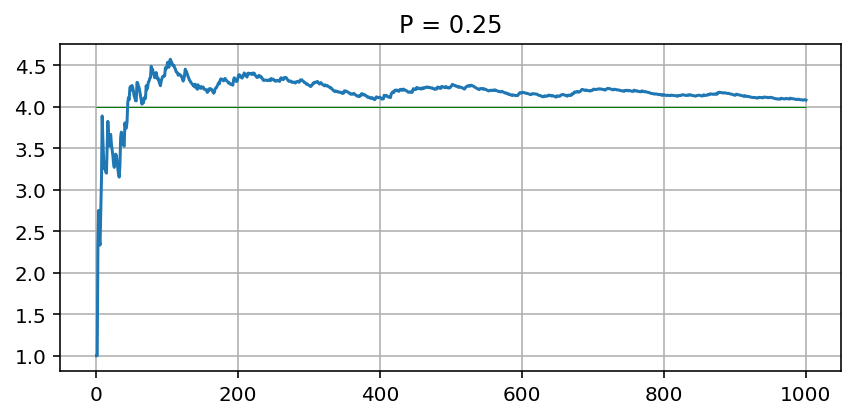

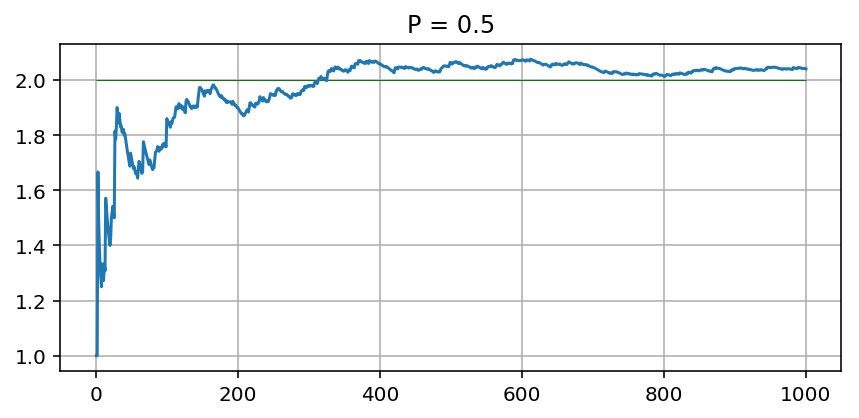

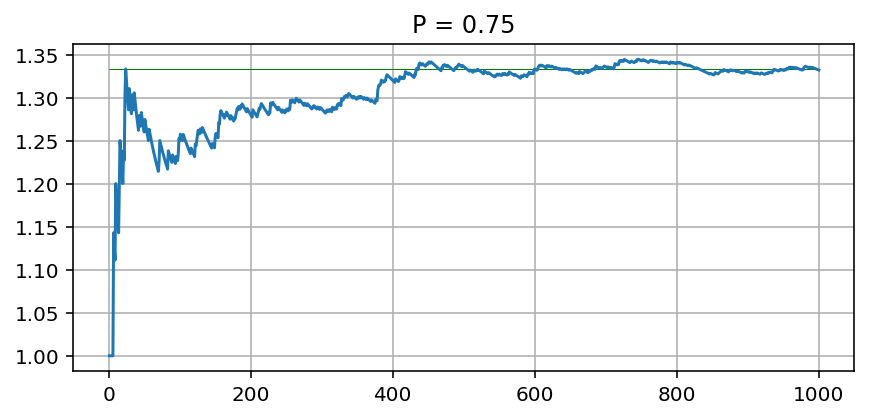

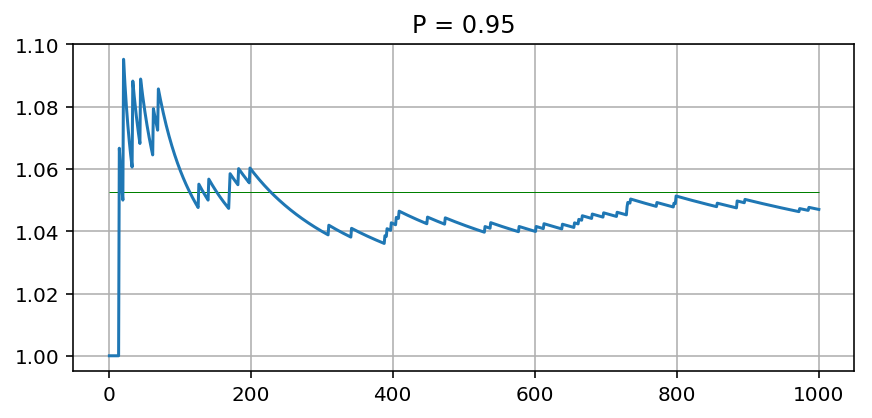

In [3]:
#1. Закон великих чисел (посилений)
#1.1

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom

p = [0.05, 0.25, 0.5, 0.75, 0.95]
for i in p:
    f = plt.gcf()
    f.set_size_inches(7, 3)
    x = geom(i)
    h = x.rvs(size=1000)
    c = h.cumsum()
    N = np.arange(1, 1001)
    plt.plot(N, c/N)
    plt.hlines(1/i, 0, len(N), 'g', linewidth=0.5)
    plt.title(f'P = {i}')
    plt.grid()
    plt.show()
    

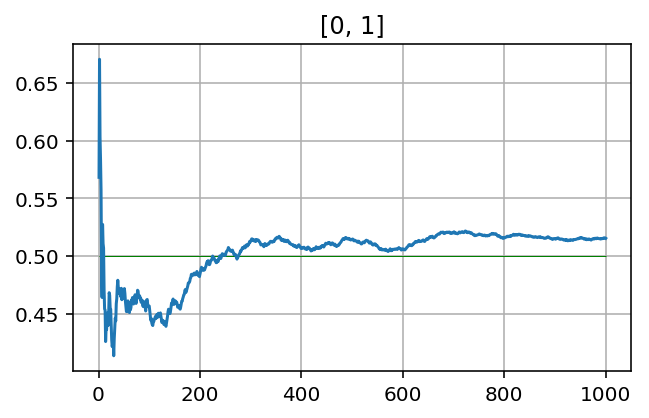

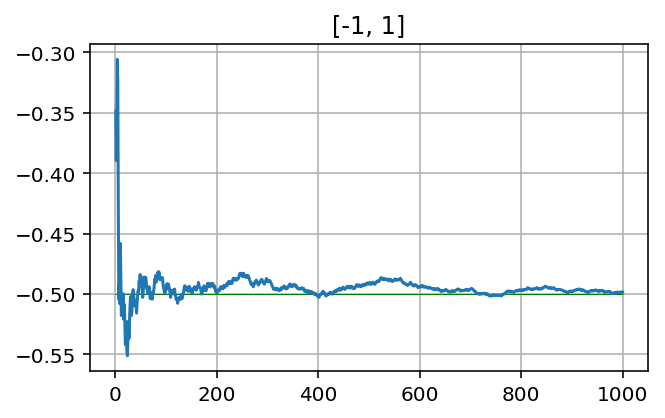

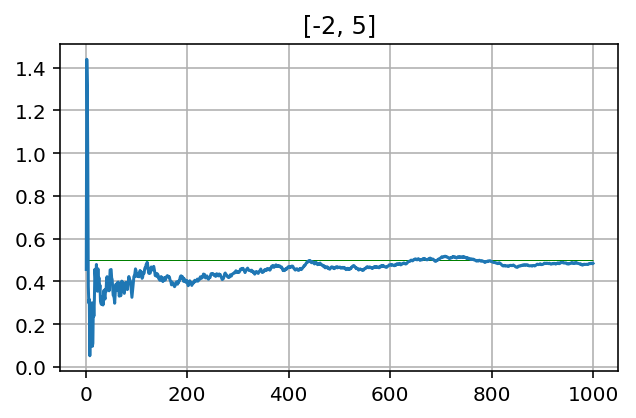

In [6]:
#1.2
from scipy.stats import uniform

p = [(0, 1), (-1, 1), (-2, 5)]
for i, j in p:
    f = plt.gcf()
    f.set_size_inches(5, 3)
    kci = uniform(i, j)
    r = kci.rvs(size = 1000)
    c = r.cumsum()
    N = np.arange(1, 1001)
    a = c/N
    plt.plot(N,  a)
    plt.hlines(kci.expect(lambda i: i), 0, len(N), 'g', linewidth=0.5)
    plt.title(f'[{i}, {j}]')
    plt.grid()
    plt.show()

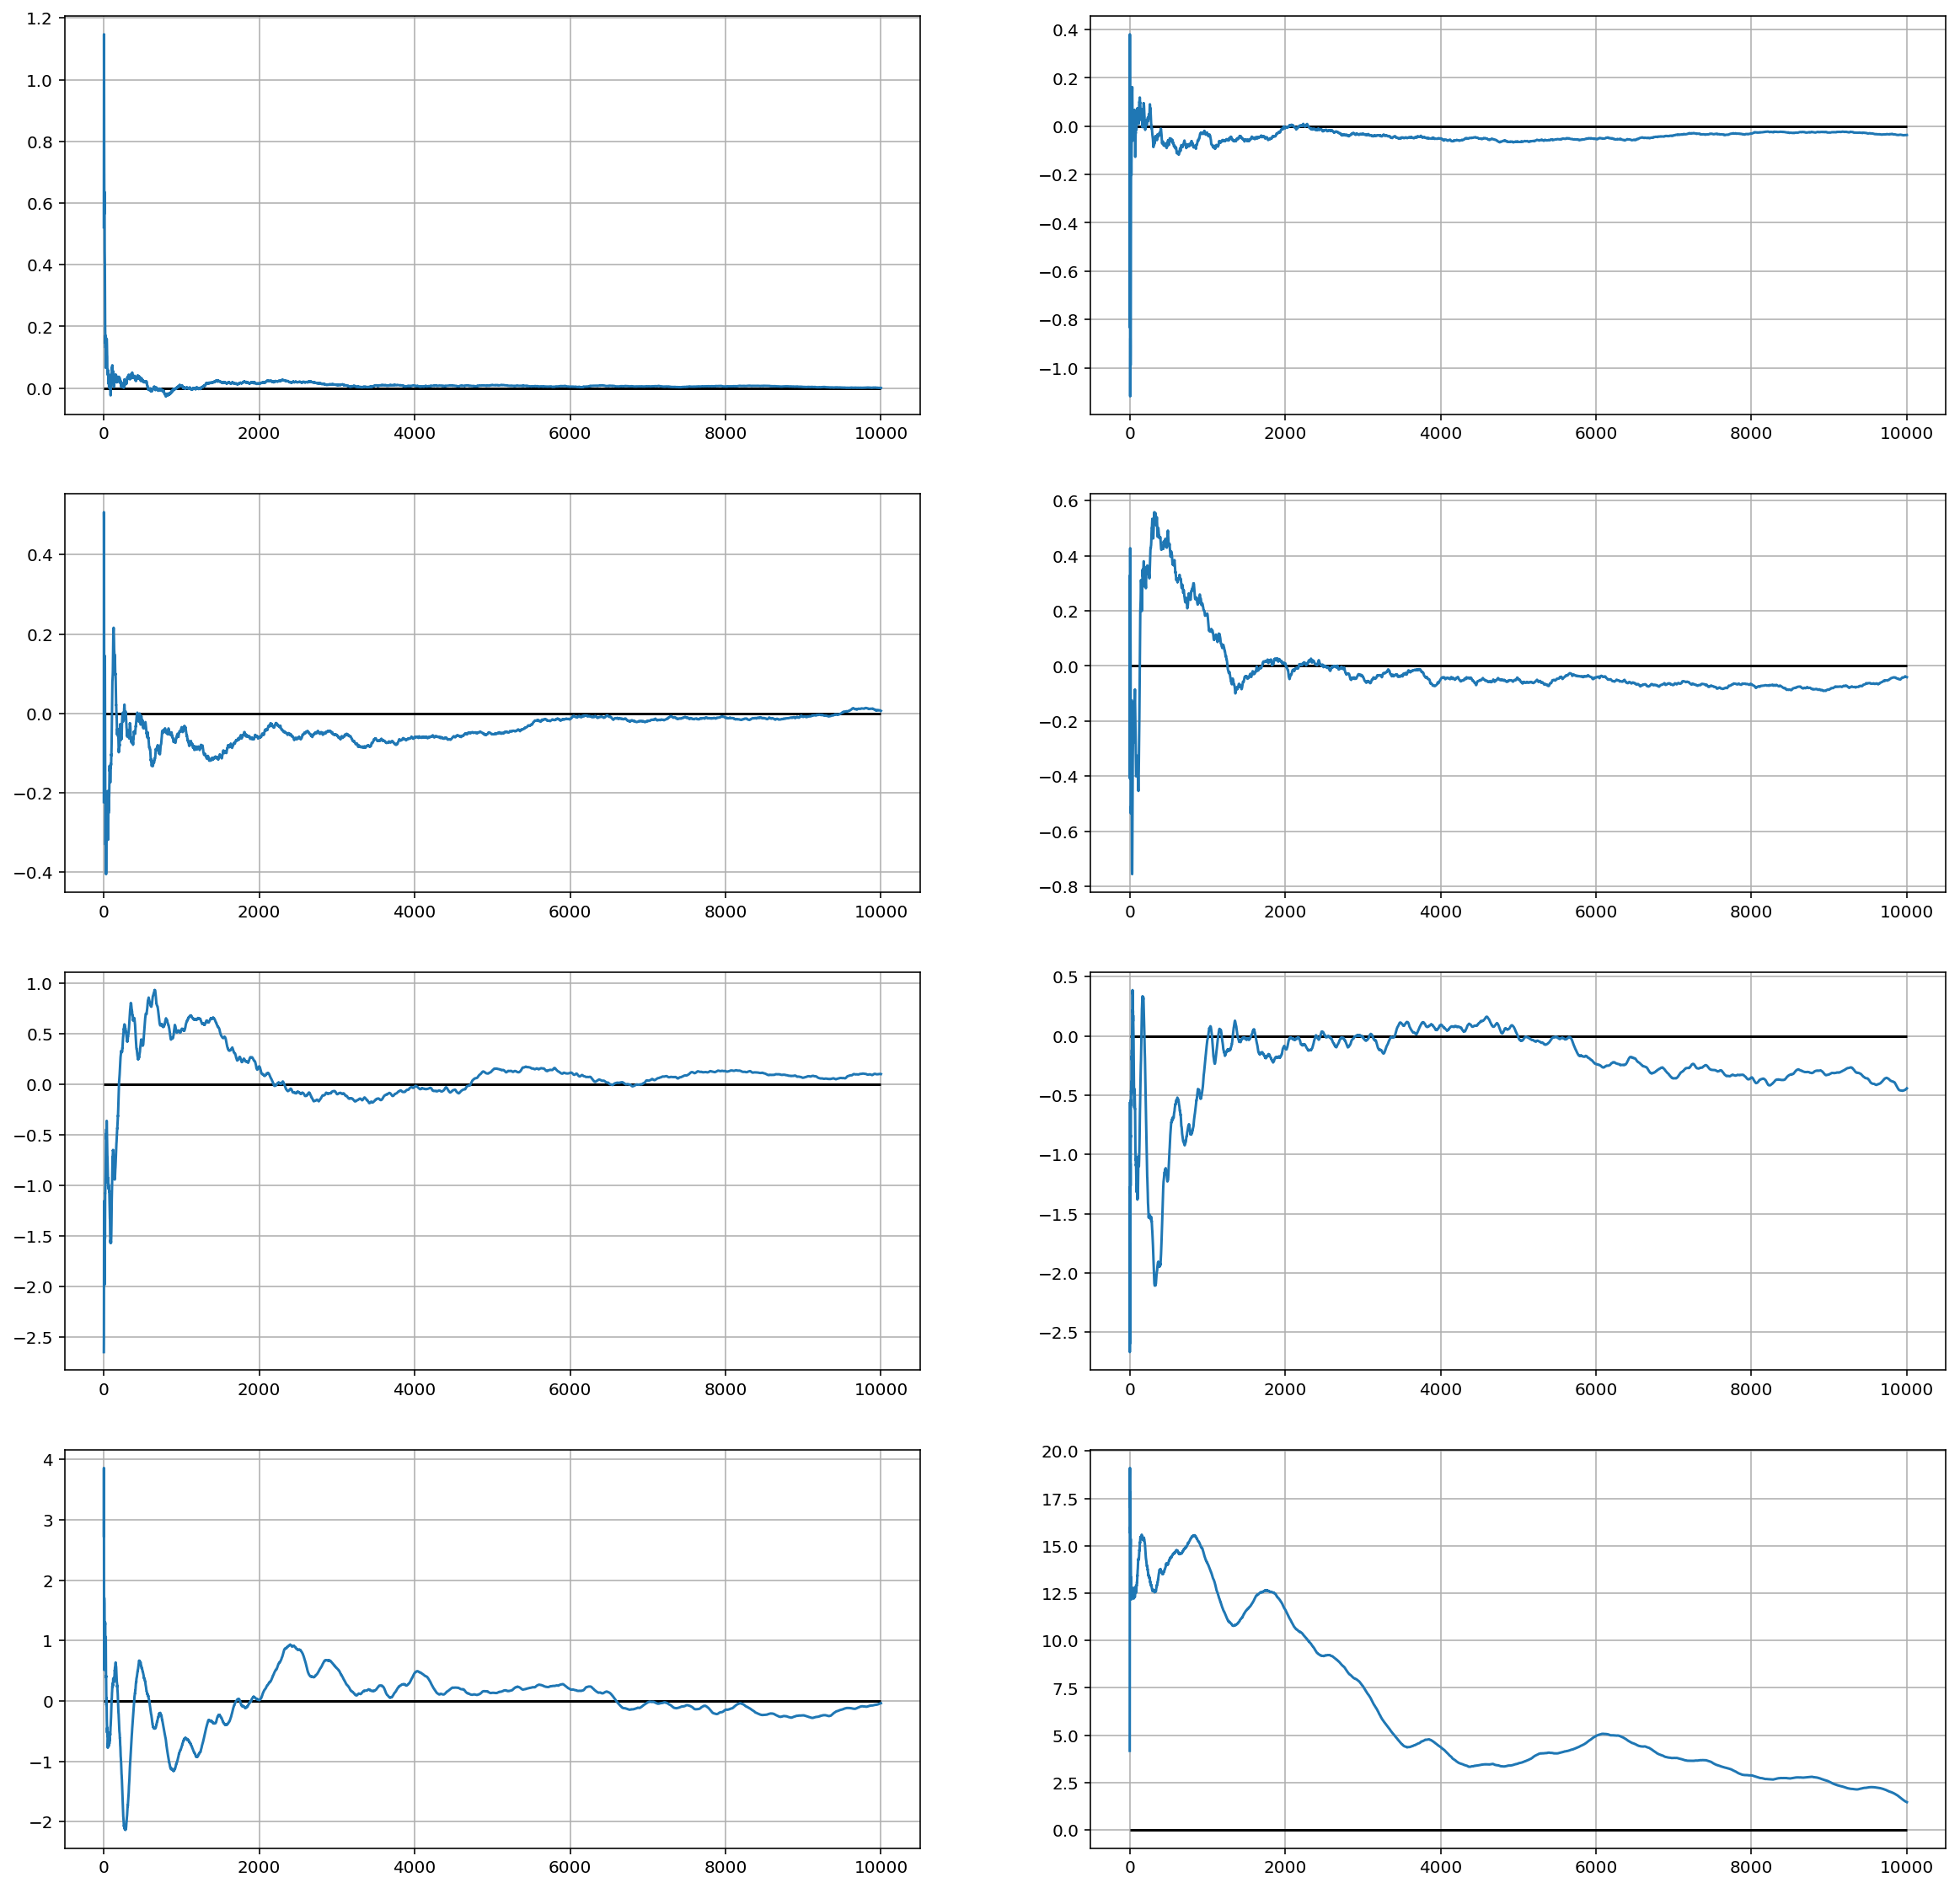

In [8]:
#1.3
from scipy.stats import norm

def create_ki(i, j):
    e = norm.rvs(size = i + j + 1)
    u = uniform.rvs(0, 1, size = j + 1)
    eps_matrix = np.zeros((i, j+1))
    for p in range(i):
        c_ = e[i - p: j + i - p + 1]   
        eps_matrix[p] = c_
    res = eps_matrix.dot(u)
    return res

N = np.arange(1, 10001)
f = plt.figure(figsize=(20, 20))
V = [1, 3, 5, 10, 25, 50, 100, 500]
for i, m in enumerate(V, 1):
    ki = create_ki(10000, m)
    plt.subplot(4, 2, i)
    a = ki.cumsum()/N
    plt.plot(N, a)
    plt.grid() 
    plt.hlines(0, 0, 10000)
    
plt.show()

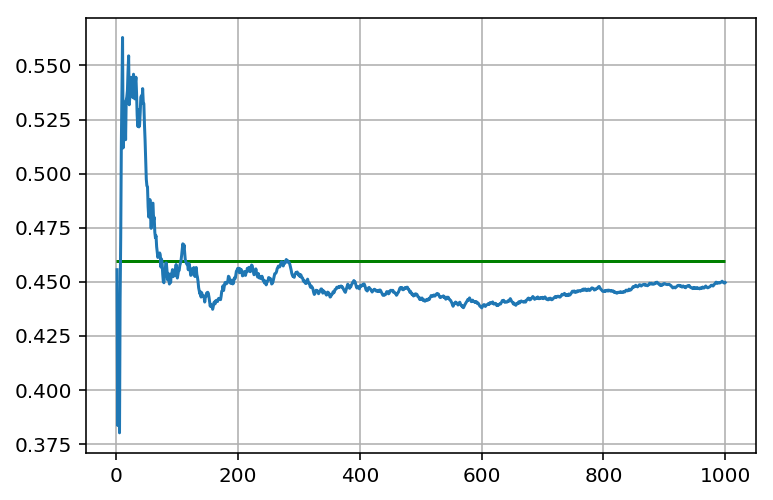

In [13]:
#2. Метод Монте-Карло
#2.1

ki = uniform.rvs(size = 1000)
sinn = np.sin(ki)
t = np.cos(0) - np.cos(1)
N = np.arange(1, 1001)
a = sinn.cumsum()/N

plt.plot(N, a)
plt.hlines(t, 0, 1000, 'g')
plt.grid()
plt.show()

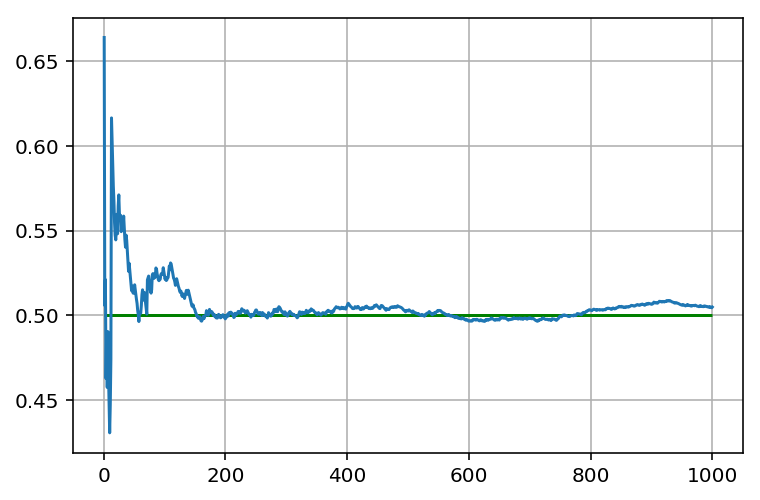

In [19]:
#2.2

from scipy.stats import expon

ki = expon.rvs(loc = 1, size = 1000)
f = 1 / ki ** 3

res = f / expon.pdf(ki, loc=1)
res_ = res.cumsum() / N
plt.plot(N, res_)
plt.hlines(0.5, 0, 1000, 'g')
plt.grid()
plt.show()


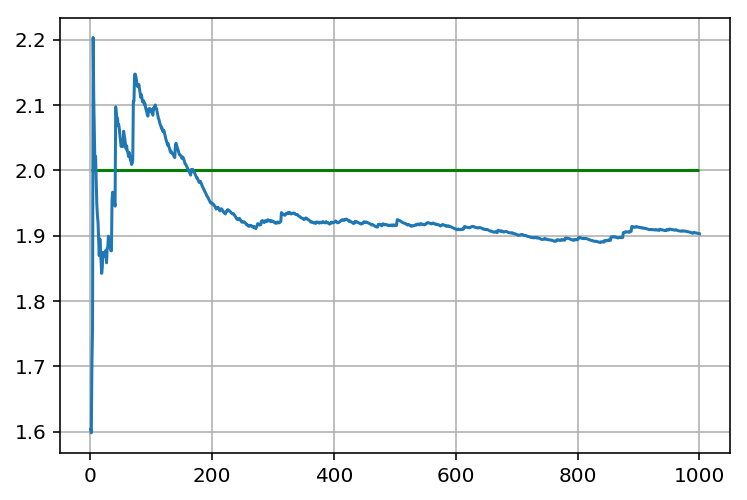

In [20]:
#2.3

from scipy.stats import norm
n = norm.rvs(size = 1000)
f = np.exp(-np.abs(n))

res = f / norm.pdf(n)
N = np.arange(1, 1001)

a = res.cumsum() / N
plt.plot(N, a)
plt.hlines(2, 1, 1000, 'g')
plt.grid()
plt.show()

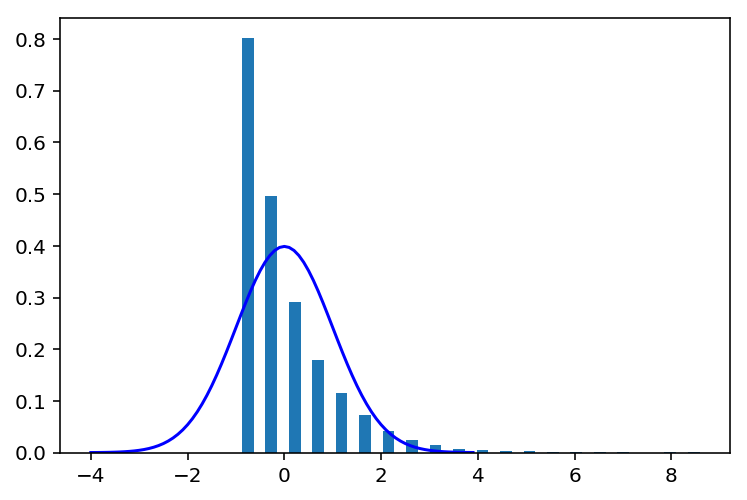

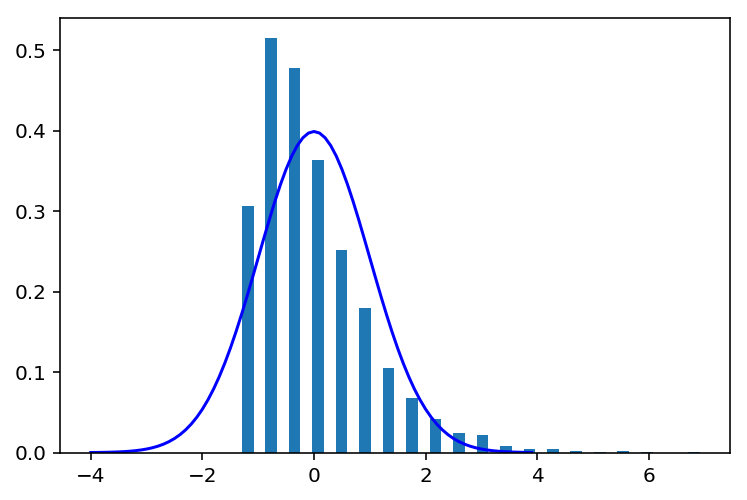

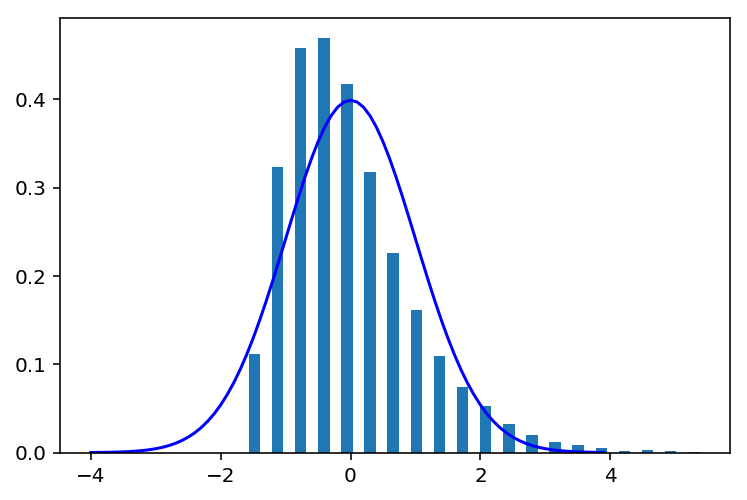

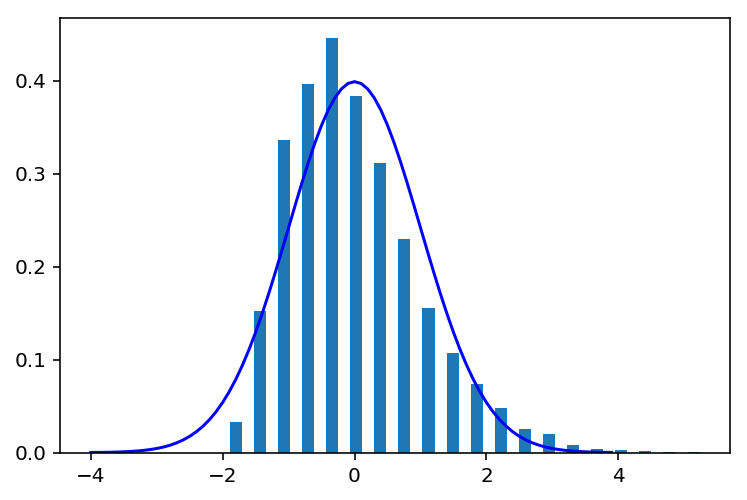

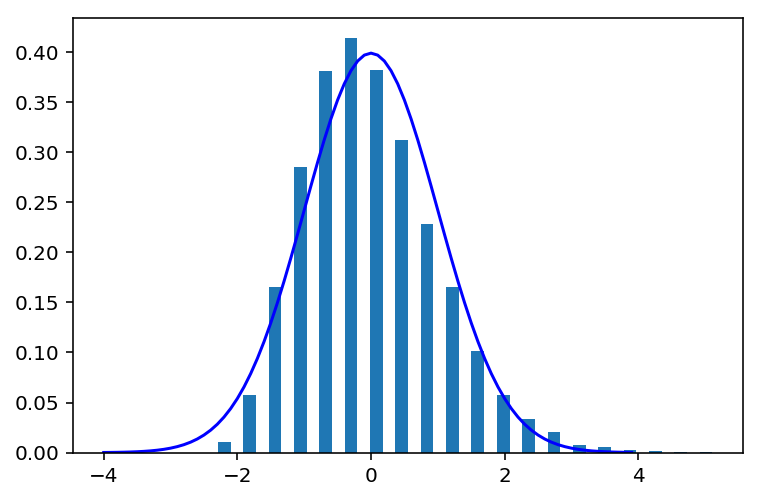

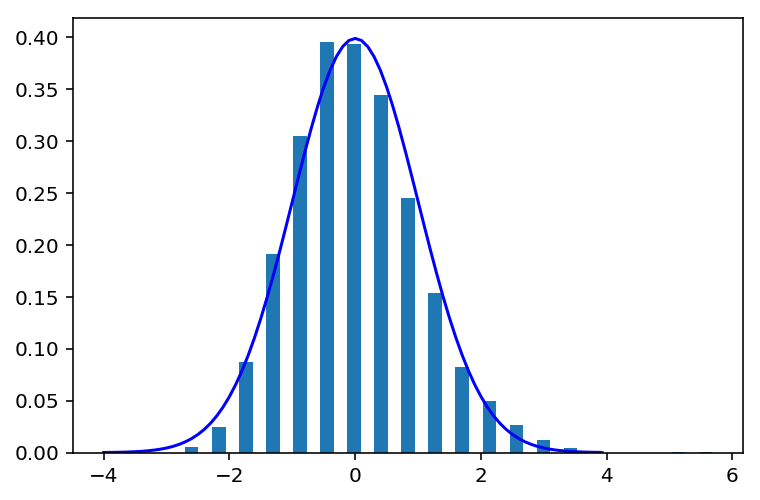

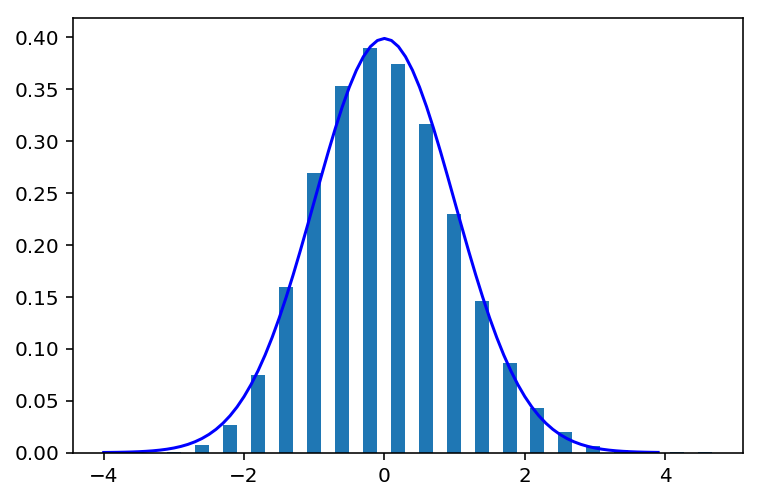

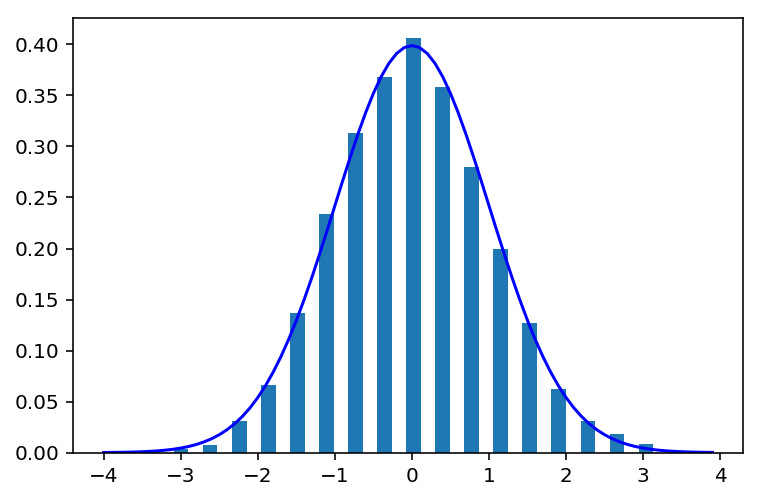

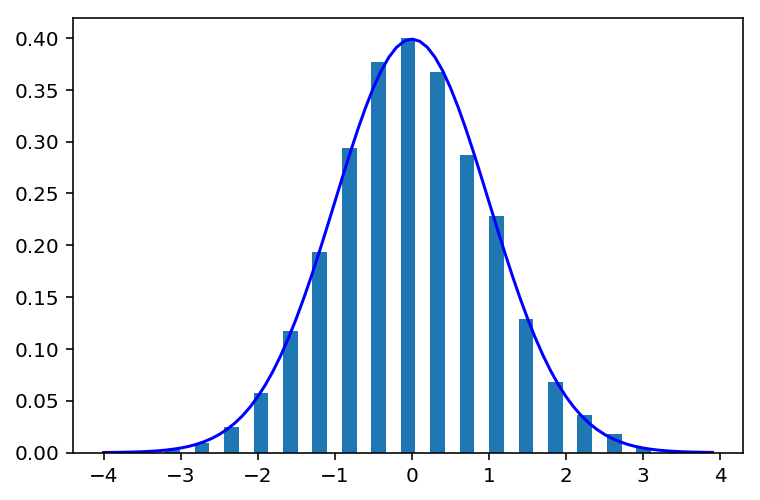

In [17]:
#3. Центральна гранична теорема
#3.1

def _xi( n, r, n_samples = 10000,):
    results = []
    for i in range(10000):
        _r = r.rvs(size=n)
        results.append(_r)
    return np.matrix(results)


ex = expon(0, 1)
matrix_ = _xi( 200, ex, n_samples = 10000,)

n = [1,2,3,5,10,25,50,100,200]
for i in n:
    matrix_1 = matrix_[:, :i]
    new_values = (matrix_1.sum(axis=1) - i) * 1/(np.sqrt(i))
    plt.hist(new_values, rwidth=0.5, density=True, bins=20)

    t = np.arange(-4, 4, 0.1)
    plt.plot(t, norm(0, 1).pdf(t), 'b')
    plt.show()

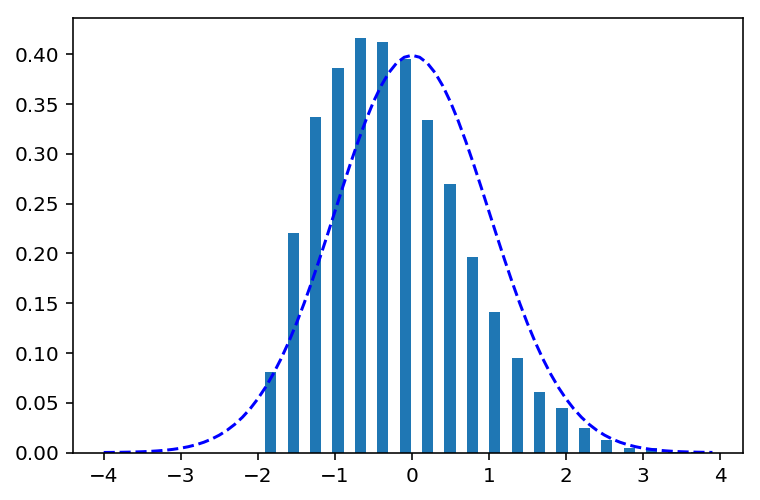

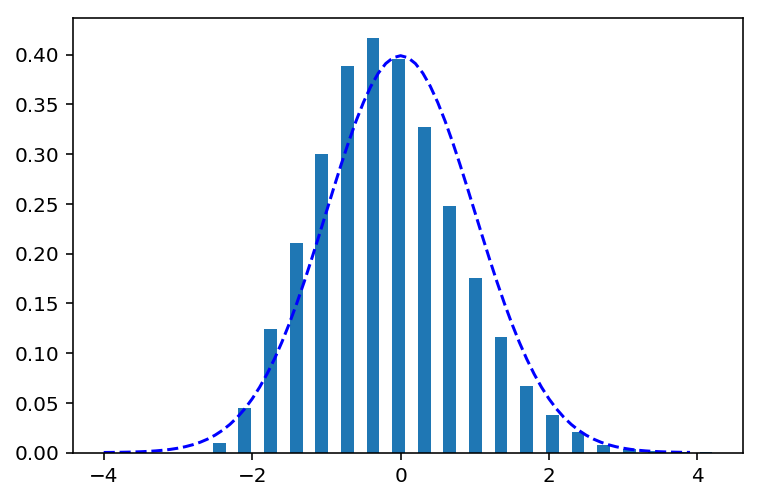

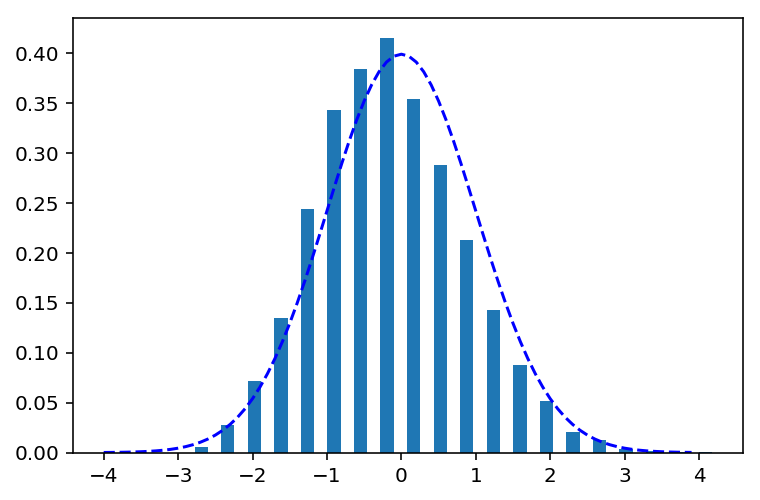

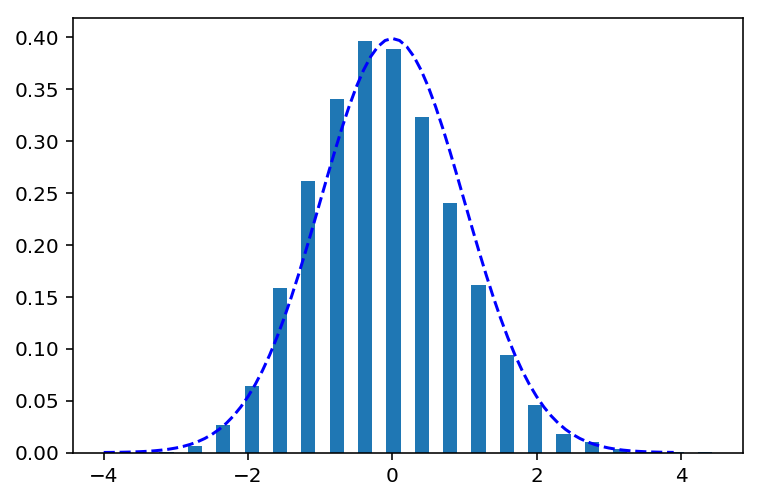

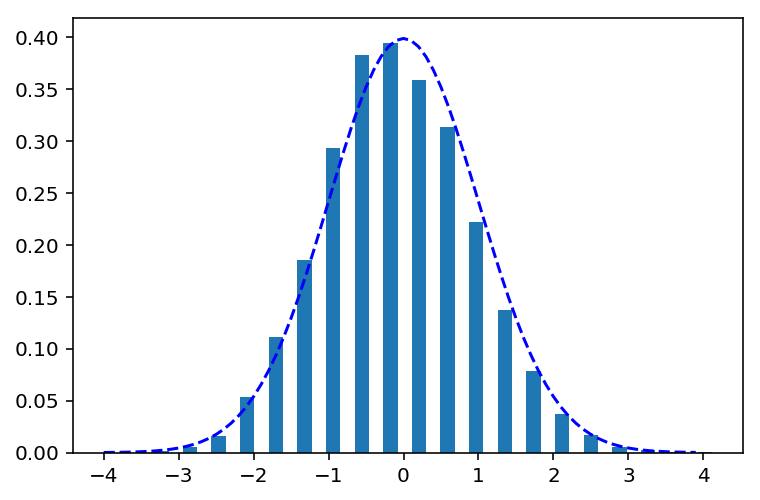

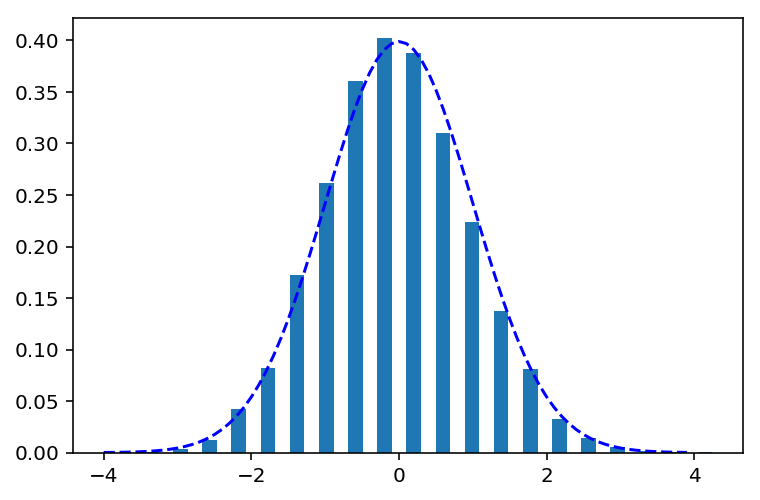

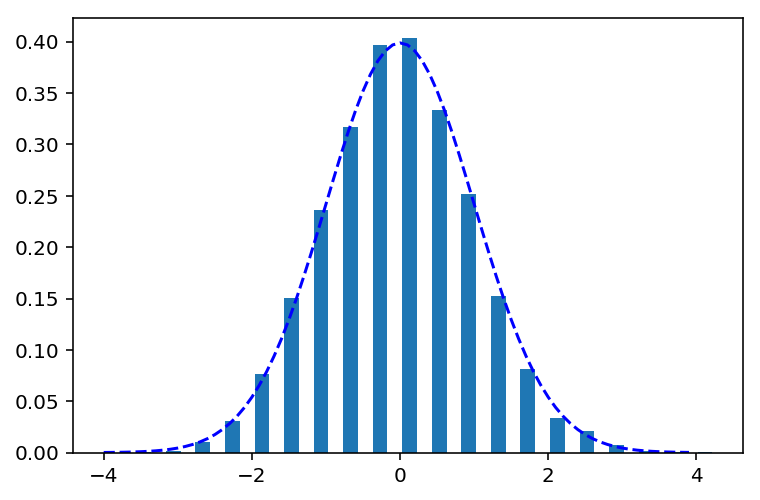

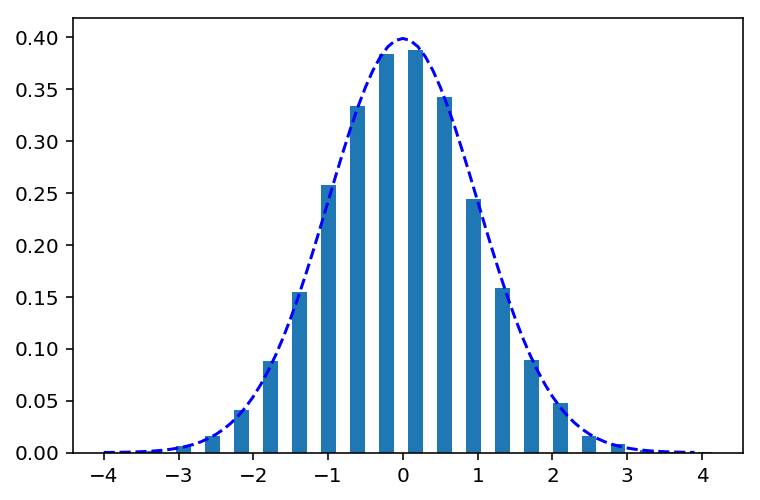

In [18]:
#3.2

ex = expon(0,1)
our_matrix =_xi(  100, ex, n_samples = 10000)

n = [1,2,3,5,10,25,50,100]
for i in n:
    matrix_ = our_matrix[:, :i]
    v = 2*(np.sqrt(matrix_.sum(axis=1)) - i**(1/2))
    plt.hist(v, rwidth=0.5, density=True, bins=20)
    s = np.arange(-4, 4, 0.1)
    n = norm(0,1)
    plt.plot(s, n.pdf(s), 'b--')
    plt.show()

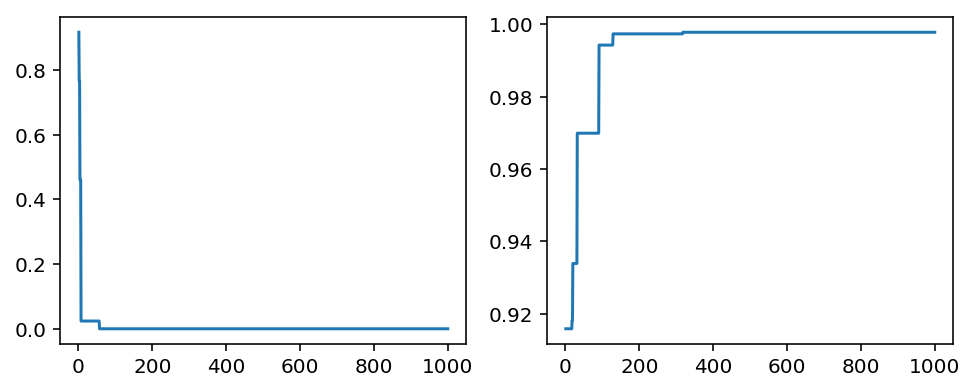

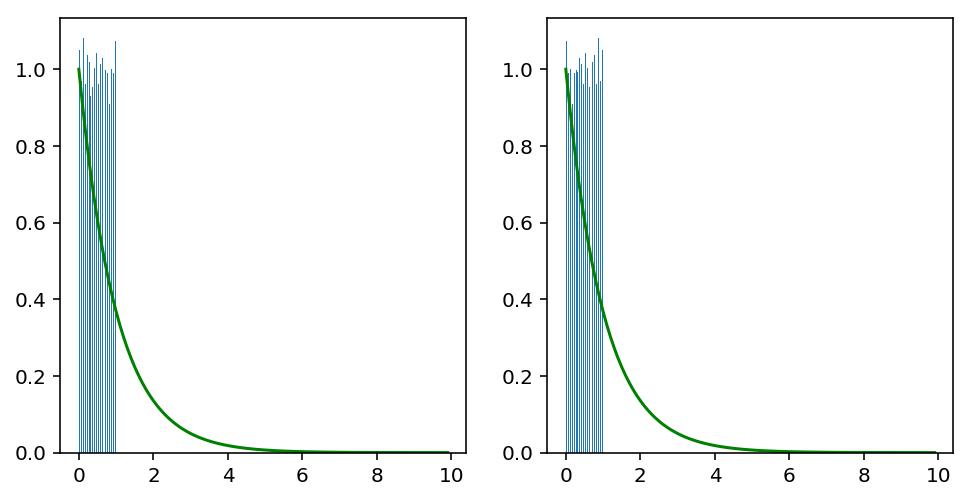

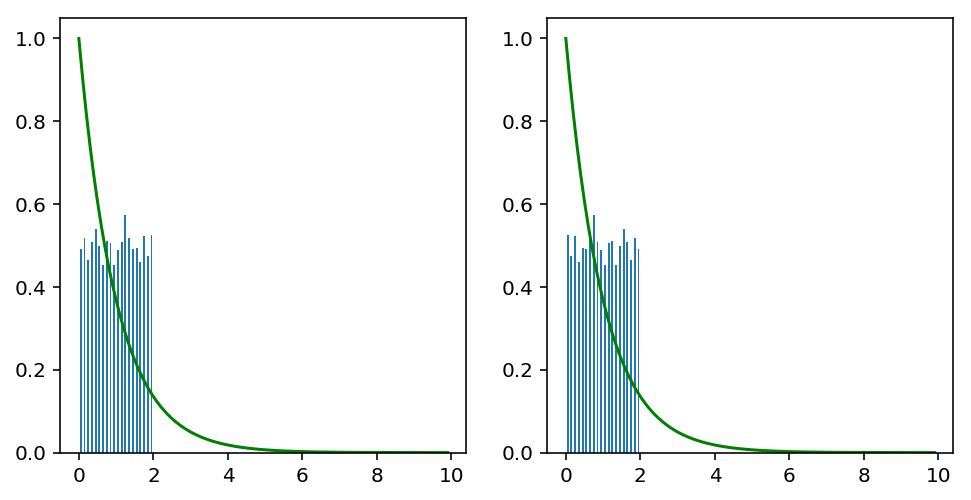

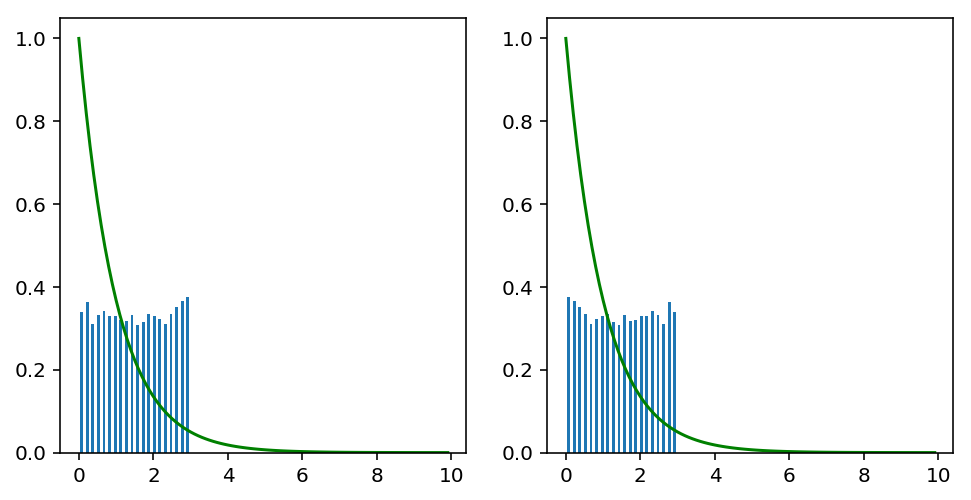

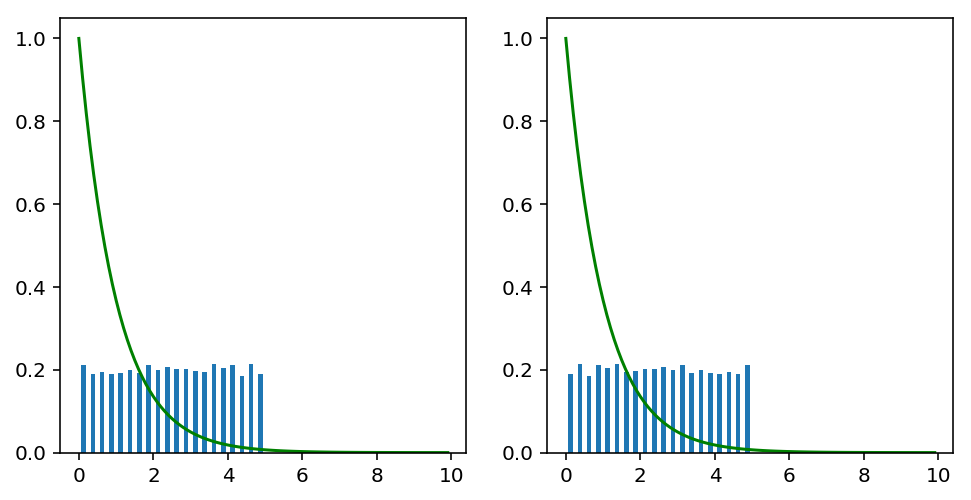

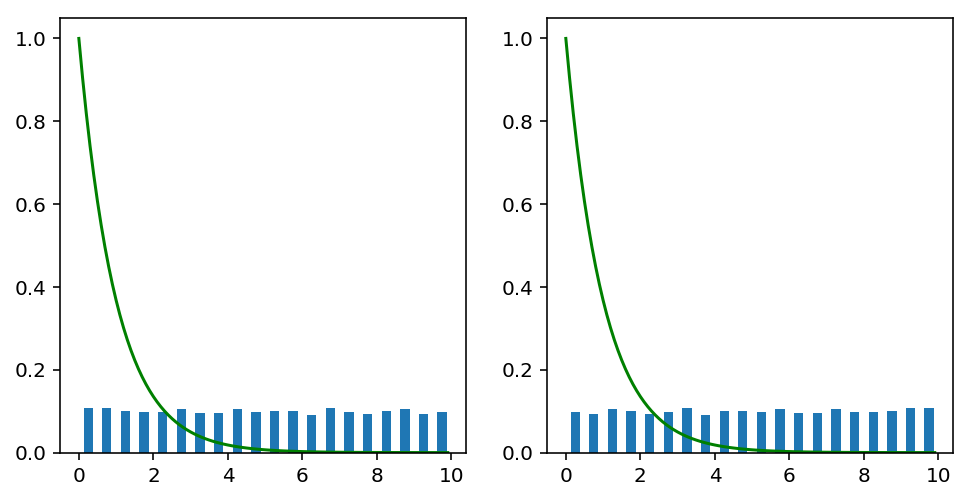

In [22]:
#3.3

def _xi( n, r, n_samples = 10000,):
    results = []
    for i in range(10000):
        _r = r.rvs(size = 1000)
        results.append(_r)
    return np.matrix(results) 


f = plt.figure(figsize=(8, 3))

ax1 = f.add_subplot(121)
rvs = uniform(0, 1).rvs(size = 1000)
minimums = np.minimum.accumulate(rvs)
ax1.plot(np.arange(1, 1001), minimums)

ax2 = f.add_subplot(122)
max_ = np.maximum.accumulate(rvs)
ax2.plot(np.arange(1, 1001), max_)
 
matrix_ = _xi( 10, uniform(0, 1), n_samples = 10000)

n1 = [1,2,3,5,10]
for n in n1:
    matrix = matrix_[:, n - 1]
    f = plt.figure(figsize=(8, 4))
    
    ax1 = f.add_subplot(121)
    dzeta1 = n*matrix.min(axis=1)
    ax1.hist(dzeta1, density=True, rwidth=0.5, bins=20)
    t = np.arange(0, 10, 0.1)
    ax1.plot(t, expon(0, 1).pdf(t), 'g')
    
    ax2 = f.add_subplot(122)
    dzeta2 = n*(1 - matrix.max(axis=1))
    ax2.hist(dzeta2, density=True, rwidth=0.5, bins=20)
    ax2.plot(t, expon(0, 1).pdf(t), 'g')

    
plt.show()